.000000# UnitedStates_COVID_19_dataset



This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.



https://github.com/dsrscientist/COVID_19_Datasets/blob/master/csse_covid_19_daily_reports_us.csv

USA daily state reports (csse_covid_19_daily_reports_us)



This table contains an aggregation of each USA State level data. 

File naming convention
Field description
>Province_State - The name of the State within the USA.

>Country_Region - The name of the Country (US).

>Last_Update - The most recent date the file was pushed.

>Lat - Latitude.

>Long_ - Longitude.

>Confirmed - Aggregated confirmed case count for the state.

>Deaths - Aggregated Death case count for the state.

>Recovered - Aggregated Recovered case count for the state.

>Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).

>FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.

>Incident_Rate - confirmed cases per 100,000 persons.

>People_Tested - Total number of people who have been tested.

>People_Hospitalized - Total number of people hospitalized.

>Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.

>UID - Unique Identifier for each row entry.

>ISO3 - Officialy assigned country code identifiers.

>Testing_Rate - Total number of people tested per 100,000 persons.

>Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.


Field description

FIPS: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.

Admin2: County name. US only.

Province_State: Province, state or dependency name.

Country_Region: Country, region or sovereignty name. The names of locations included on the Website correspond with 
the official designations used by the U.S. Department of State.

Last Update: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).

Lat and Long_: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on 
geographic centroids, and are not representative of a specific address, building or any location at a spatial scale 
finer than a province/state. Australian dots are located at the centroid of the largest city in each state.

Confirmed: Confirmed cases include presumptive positive cases and probable cases, in accordance with CDC guidelines as of April 14.

Deaths: Death totals in the US include confirmed and probable, in accordance with CDC guidelines as of April 14.

Recovered: Recovered cases outside China are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.

Active: Active cases = total confirmed - total recovered - total deaths.

Incidence_Rate: Admin2 + Province_State + Country_Region.

Case-Fatality Ratio (%): = confirmed cases per 100,000 persons.

US Testing Rate: = total test results per 100,000 persons. The "total test results" is equal to "Total test results (Positive + Negative)" from COVID Tracking Project.

US Hospitalization Rate (%): = Total number hospitalized / Number confirmed cases. The "Total number hospitalized" is the "Hospitalized – Cumulative" count from COVID Tracking Project. The "hospitalization rate" and "hospitalized - Cumulative" data is only presented for those states which provide cumulative hospital data.

In [2]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [29]:
df=pd.read_csv("covid19_daily_report_us.csv",parse_dates=["Last_Update"])
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [30]:
df.shape

(58, 18)

In [31]:
df.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [32]:
df.isnull().sum()


Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [33]:
#imputing with values
for col in df.describe().columns:
    df[col]=df[col].replace(np.NaN,df[col].mean())

In [34]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [35]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,ASM,222.857246,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584


In [38]:
print(df["ISO3"].unique())
print(df["ISO3"].value_counts())
      

['USA' 'ASM' 'GUM' 'MNP' 'PRI' 'VIR']
USA    53
ASM     1
MNP     1
GUM     1
PRI     1
VIR     1
Name: ISO3, dtype: int64


# Data Visualization

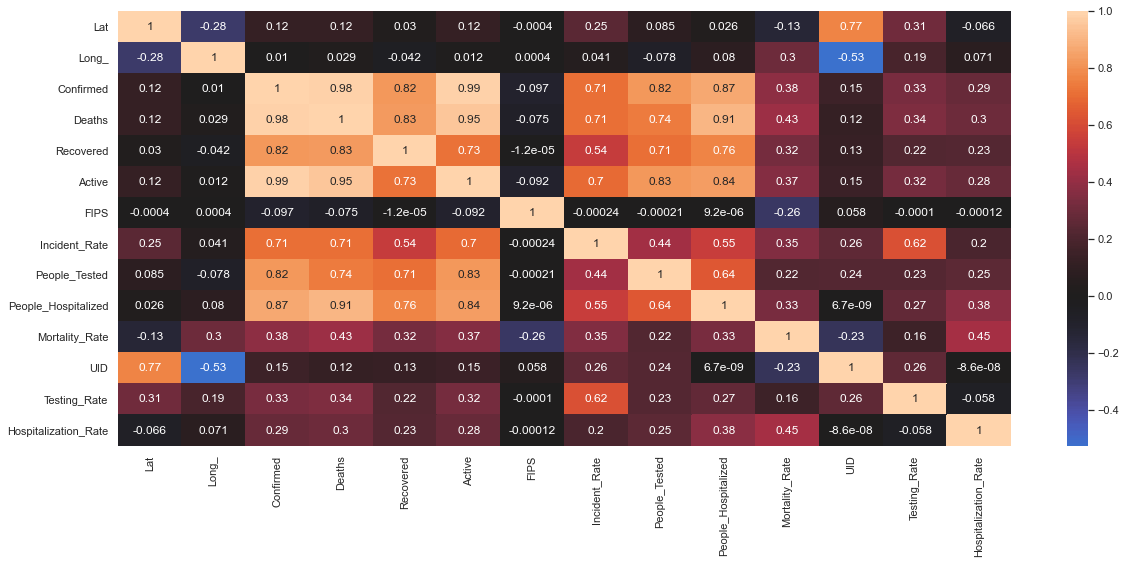

In [44]:
#plot correlation with heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,center=0)

USA    53
ASM     1
MNP     1
GUM     1
PRI     1
VIR     1
Name: ISO3, dtype: int64

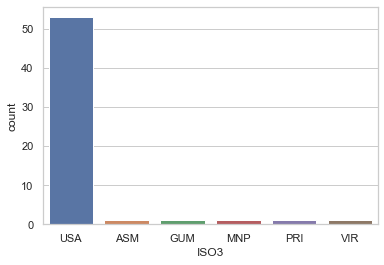

In [40]:
sns.set(style="whitegrid")
sns.countplot(df["ISO3"])
df["ISO3"].value_counts()

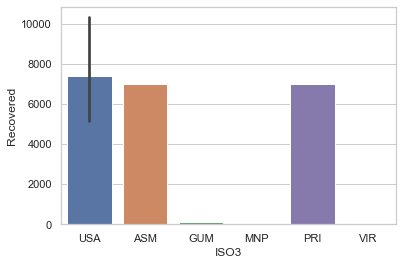

In [47]:
sns.set(style="whitegrid")
sns.barplot(x="ISO3",y="Recovered",data=df)
plt.show()

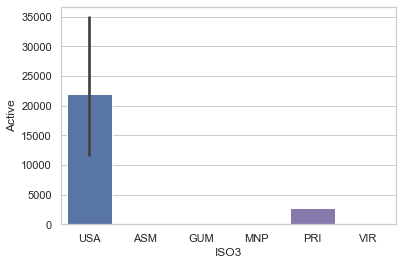

In [48]:
sns.set(style="whitegrid")
sns.barplot(x="ISO3",y="Active",data=df)
plt.show()

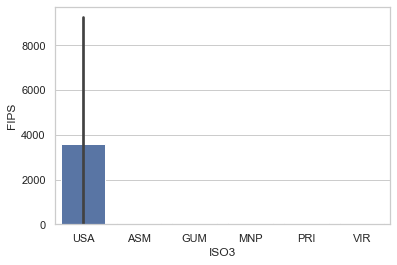

In [49]:
sns.set(style="whitegrid")
sns.barplot(x="ISO3",y="FIPS",data=df)
plt.show()

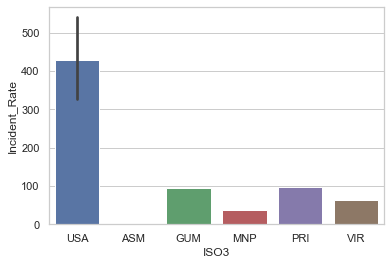

In [50]:
sns.set(style="whitegrid")
sns.barplot(x="ISO3",y="Incident_Rate",data=df)
plt.show()

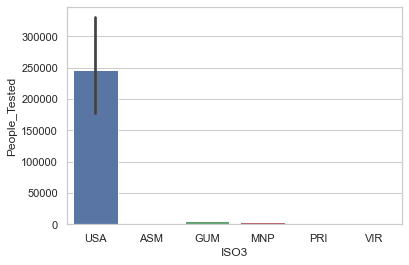

In [51]:
sns.set(style="whitegrid")
sns.barplot(x="ISO3",y="People_Tested",data=df)
plt.show()

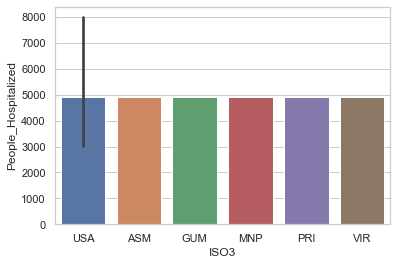

In [52]:
sns.set(style="whitegrid")
sns.barplot(x="ISO3",y="People_Hospitalized",data=df)
plt.show()

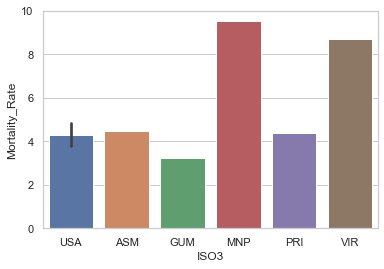

In [53]:
sns.set(style="whitegrid")
sns.barplot(x="ISO3",y="Mortality_Rate",data=df)
plt.show()

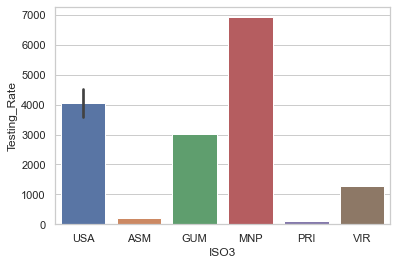

In [54]:
sns.set(style="whitegrid")
sns.barplot(x="ISO3",y="Testing_Rate",data=df)
plt.show()

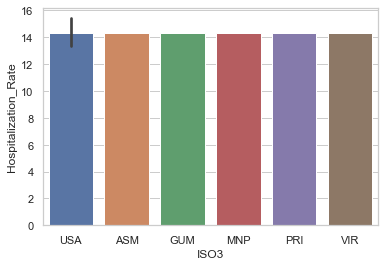

In [55]:
sns.set(style="whitegrid")
sns.barplot(x="ISO3",y="Hospitalization_Rate",data=df)
plt.show()

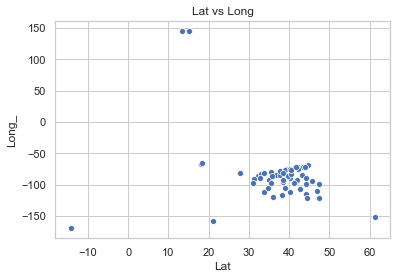

In [58]:
sns.set(style="whitegrid")
sns.scatterplot(x="Lat",y="Long_",data=df)
plt.title("Lat vs Long")
plt.show()

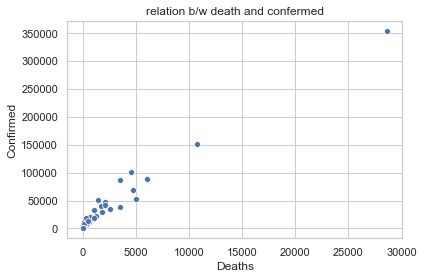

In [61]:
sns.set(style="whitegrid")
sns.scatterplot(x="Deaths",y="Confirmed",data=df)
plt.title("relation b/w death and confermed")
plt.show()

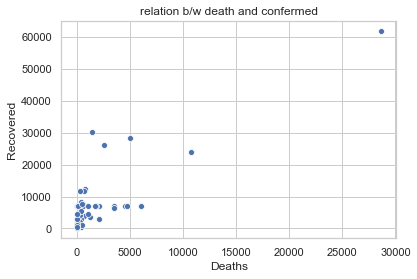

In [62]:
sns.set(style="whitegrid")
sns.scatterplot(x="Deaths",y="Recovered",data=df)
plt.title("relation b/w death and confermed")
plt.show()

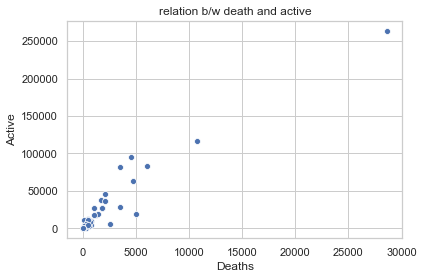

In [63]:
sns.set(style="whitegrid")
sns.scatterplot(x="Deaths",y="Active",data=df)
plt.title("relation b/w death and active")
plt.show()

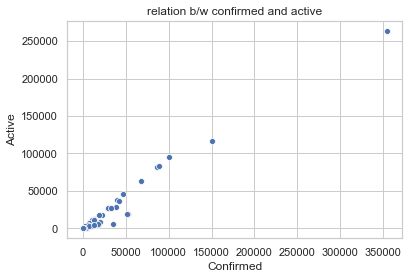

In [64]:
sns.set(style="whitegrid")
sns.scatterplot(x="Confirmed",y="Active",data=df)
plt.title("relation b/w confirmed and active")
plt.show()

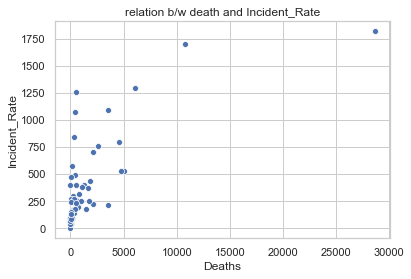

In [66]:
sns.set(style="whitegrid")
sns.scatterplot(x="Deaths",y="Incident_Rate",data=df)
plt.title("relation b/w death and Incident_Rate")
plt.show()

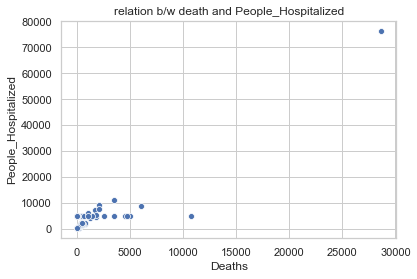

In [67]:
sns.set(style="whitegrid")
sns.scatterplot(x="Deaths",y="People_Hospitalized",data=df)
plt.title("relation b/w death and People_Hospitalized")
plt.show()

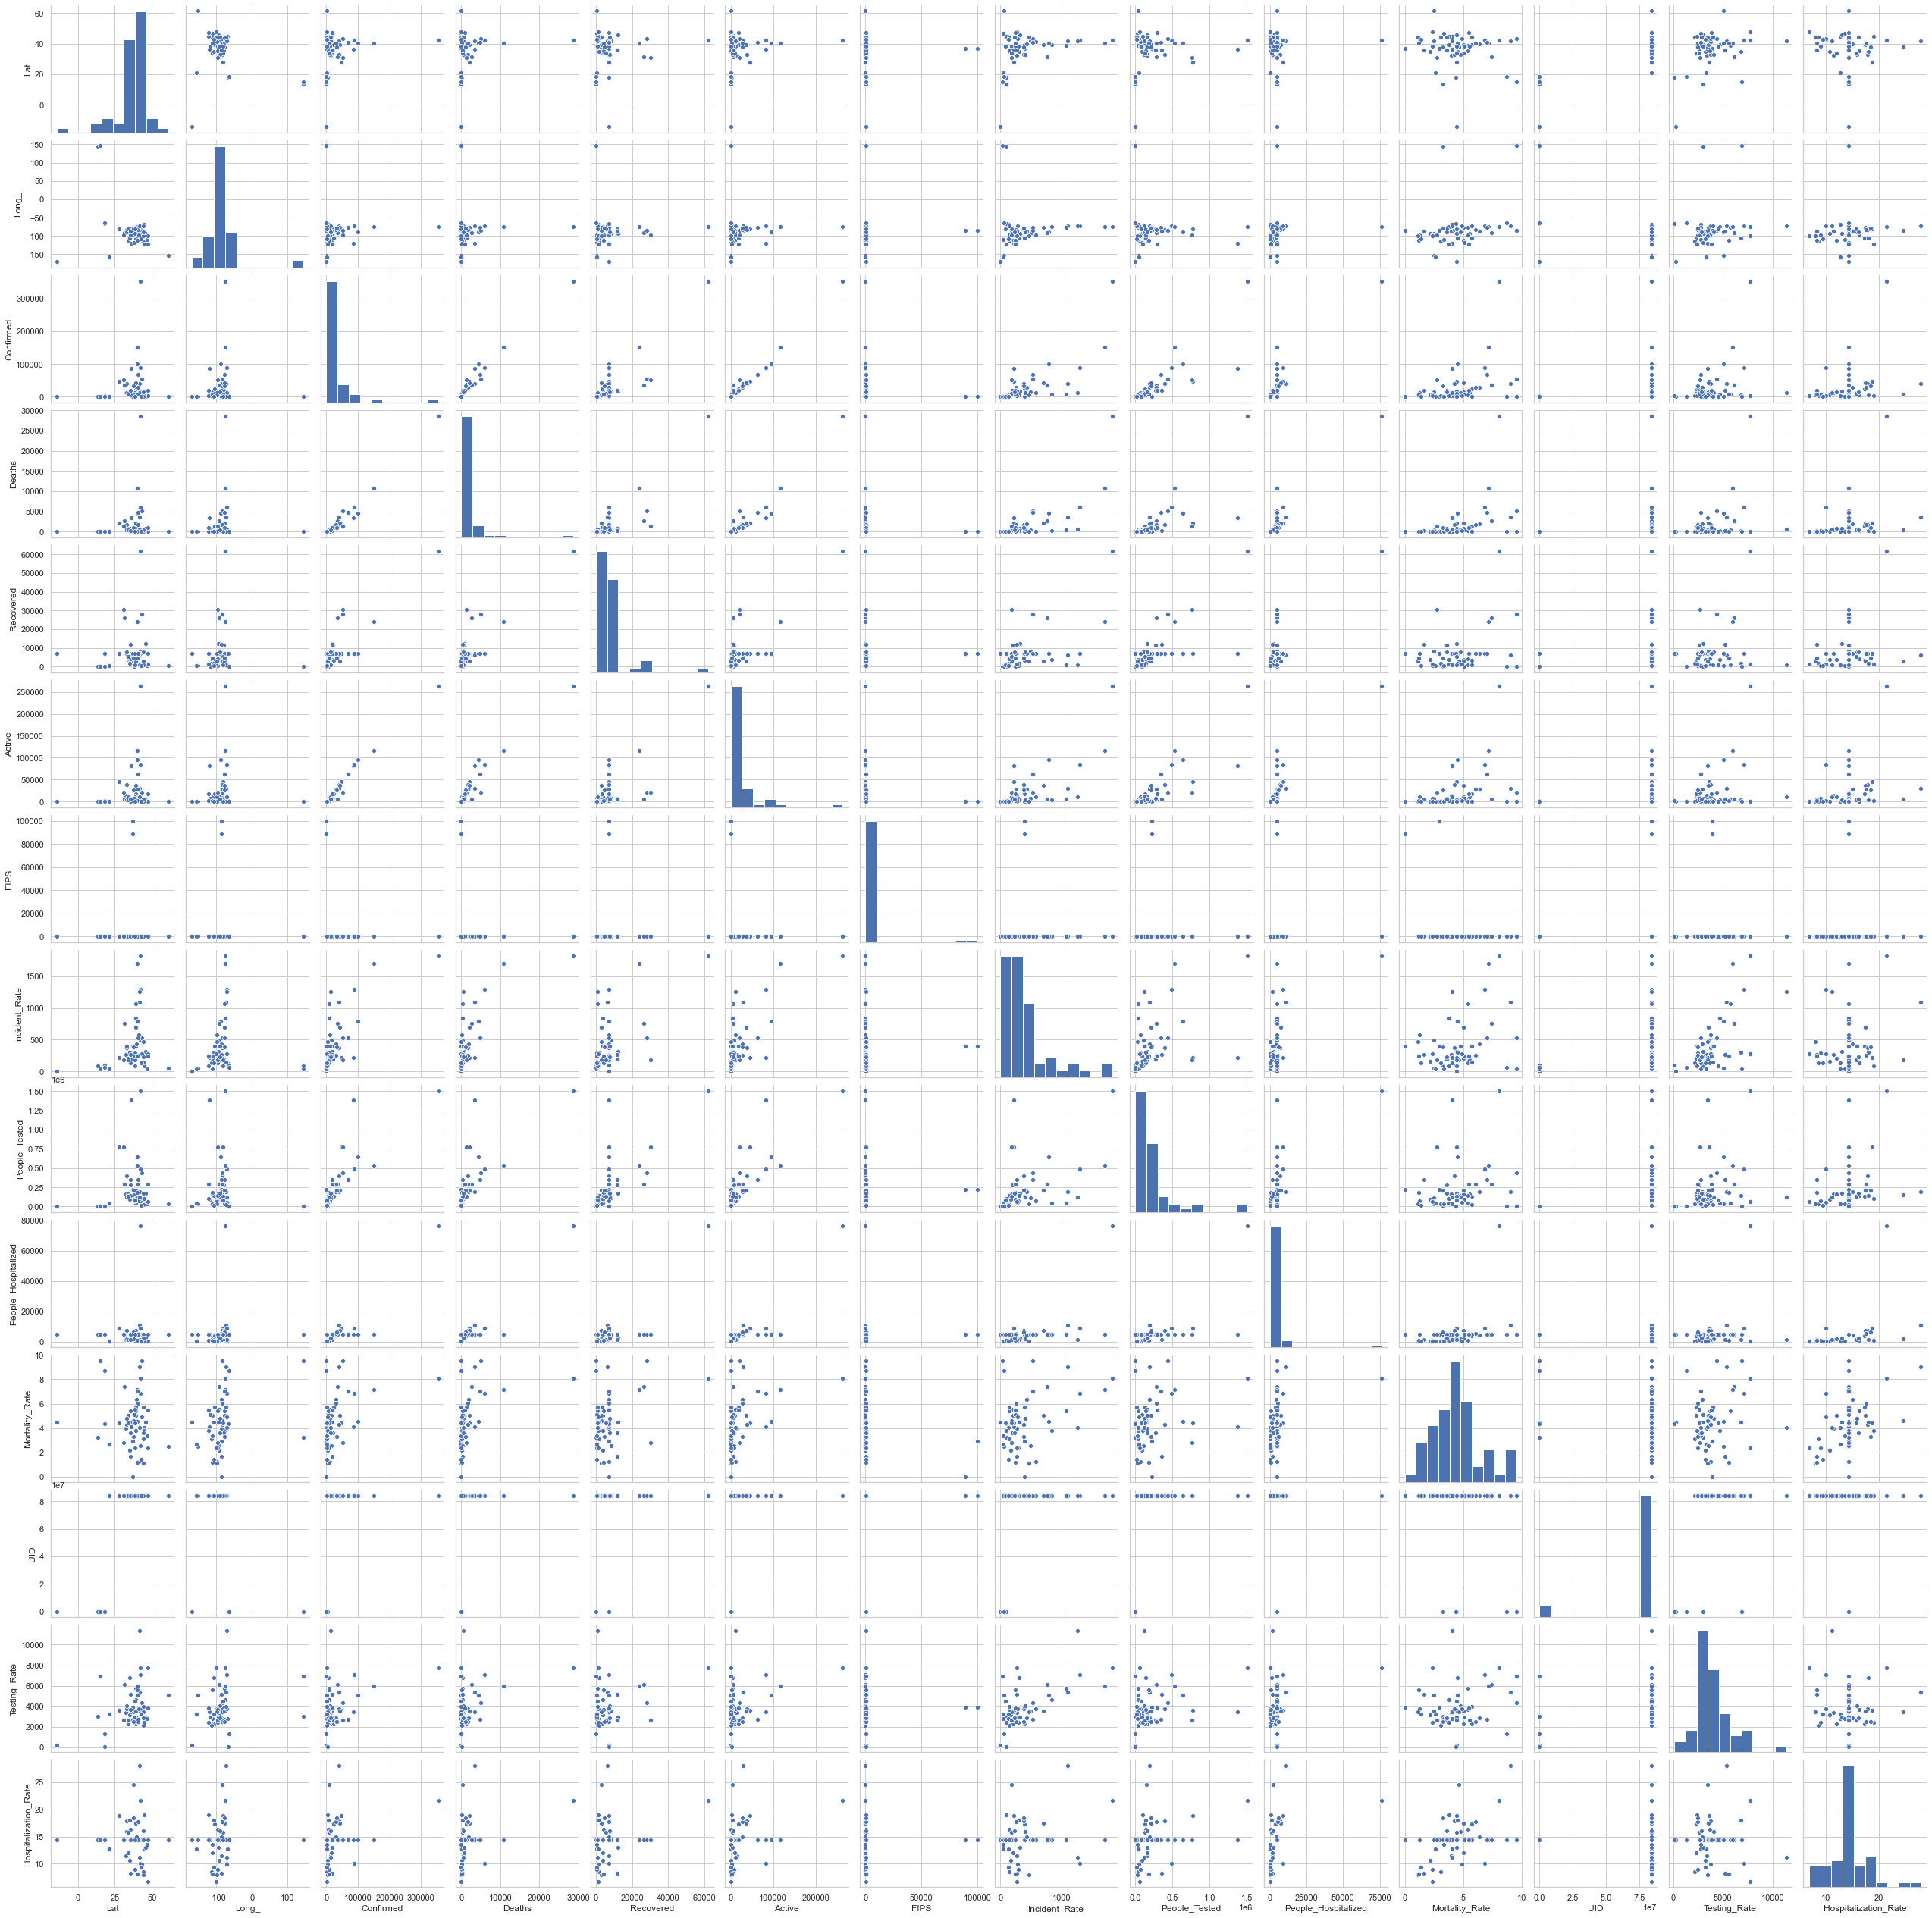

In [68]:
#pairplot for all
sns.pairplot(df)